## Cual es la cantidad de rondas que ganan ambos equipos en los cuatro mapas

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Cargar los datos
db = 'https://raw.githubusercontent.com/razbackup/CSV-EV2/main/dbcs.csv'
data = pd.read_csv(db, engine='python', sep=';', encoding='utf-8')

In [12]:
def findMapByMatch(match):
    return match['Map'].iloc[0]

def findRoundByMatch(match):
    return list(match["RoundId"].drop_duplicates())

def ValidBool(string):
    return True if string == "True" else False


def findMatchsIds(data):
    match_id= data['MatchId'] # columnas MatchId
    unique_matchs_maps = match_id.drop_duplicates() # Filtra los IDS
    arr = unique_matchs_maps.to_numpy() # Convierte a array
    lista = arr.tolist() # Convierte a lista  
    return lista

def findMatchs(data):
    matchs_ids = findMatchsIds(data)
    matchs = []
    for i in matchs_ids:
        match = data[data['MatchId'] == i]
        matchs.append(match)
    return matchs


def findWinnerOfMapByMatch(match):    
    map_ = findMapByMatch(match)
    rounds = findRoundByMatch(match=match)
    T, CT = 0,0
    for i in rounds:
        matchByRound = match[match["RoundId"] == i]
        matchByRoundByT, matchByRoundByCT = matchByRound[matchByRound["Team"] == "Terrorist"], matchByRound[matchByRound["Team"] == "CounterTerrorist"]
        winT, winCT = matchByRoundByT["RoundWinner"].dropna().value_counts().index[0], matchByRoundByCT["RoundWinner"].dropna().value_counts().index[0]
        winT, winCT = ValidBool(winT), ValidBool(winCT)
        
        T += 1 if winT else 0
        CT += 1 if winCT else 0
    
    RoundWinners = {
        "Map": map_,
        "Terrorist": T,
        "CounterTerrorist": CT
    }
    
    return RoundWinners

In [13]:
# T, CT
info_inferno, info_nuke, info_mirage, info_dust2  = [0,0], [0,0], [0,0], [0,0]
matchs = findMatchs(data=data)
maps = ['de_inferno', 'de_nuke', 'de_mirage', 'de_dust2']
map_info = {
    maps[0]: [0, 0],  # Inferno
    maps[1]: [0, 0],  # Nuke
    maps[2]: [0, 0],  # Mirage
    maps[3]: [0, 0]   # Dust2
}

In [14]:
for match in matchs:
    match_obj = findWinnerOfMapByMatch(match=match)
    map_name = match_obj["Map"]
    terrorist_score = match_obj["Terrorist"]
    counterterrorist_score = match_obj["CounterTerrorist"]
    
    # Actualizar la información del mapa correspondiente
    if map_name in map_info:
        map_info[map_name][0] += terrorist_score
        map_info[map_name][1] += counterterrorist_score

In [15]:
# Preparar datos para graficar
T = [map_info[map_name][0] for map_name in maps]
CT = [map_info[map_name][1] for map_name in maps]
x = np.arange(len(maps))  # Índices para las barras

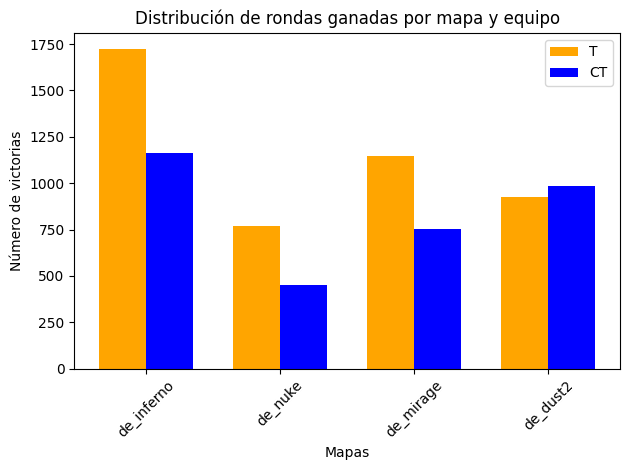

In [16]:
# Graficar
width = 0.35  # Ancho de las barras
fig, ax = plt.subplots()
barsT = ax.bar(x - width/2, T, width, label='T', color='orange')
barsCT = ax.bar(x + width/2, CT, width, label='CT', color='blue')

# Etiquetas y título
ax.set_xlabel('Mapas')
ax.set_ylabel('Número de victorias')
ax.set_title('Distribución de rondas ganadas por mapa y equipo')
ax.set_xticks(x)
ax.set_xticklabels(maps)
ax.legend()

# Mostrar gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout() 
plt.show()
